# **Notebook 15.1: GAN Toy example**

This notebook investigates the GAN toy example as illustrated in figure 15.1 in the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [39]:
"""
Module 0: Importing Libraries
"""

import numpy as np
import matplotlib.pyplot as plt

In [40]:
"""
Module 1.1: Get Real Data Batch
"""

# Get a batch of real data.  Our goal is to make data that looks like this.
def get_real_data_batch(n_sample):
  np.random.seed(0)
  x_true = np.random.normal(size=(1,n_sample)) + 7.5
  return x_true

Define our generator.  This takes a standard normally-distributed latent variable $z$ and adds a scalar $\theta$ to this, where $\theta$ is the single parameter of this generative model according to:

\begin{equation}
x_i = z_i + \theta.
\end{equation}

Obviously this model can generate the family of Gaussian distributions with unit variance, but different means.

In [41]:
"""
Module 1.2: Generator Function
- This is our generator -- takes the single parameter theta of the generative model and generates n samples
- x_i = z_i + theta
- 'z' is a normal distribution with mean 0 and theta is added to shift the mean
- Our goal is to learn theta such that the generated data looks like the real data
"""

# This is our generator -- takes the single parameter theta
# of the generative model and generates n samples
def generator(z, theta):
    x_gen = z + theta
    return x_gen

In [42]:
"""
Module 1.3: Discriminator Function
- This is our discriminator -- takes in data 'x' and parameters phi0 and phi1
- Outputs a probability between 0 and 1 indicating whether the data is real (from true distribution) or fake (from generator)

-> The job of discriminator is to separate the fake samples from the real sample.
-> Initially it will do a great job as the real data is at mean 7.5 and the fake data will be at mean somewhere close to 0.
-> A simple example could be that it will create a threshold somewhere between the two means and classify anything above that as real and below that as fake.
-> It will provide a probability close to 1 for real samples and close to 0 for fake samples.
"""

# Define our discriminative model

# Logistic sigmoid, maps from [-infty,infty] to [0,1]
def sig(data_in):
  return  1.0 / (1.0+np.exp(-data_in))

# Discriminator computes y
def discriminator(x, phi0, phi1):
  return sig(phi0 + phi1 * x)

In [43]:
"""
Module 1.4: Visualization Function
- This function visualizes the real and synthesized data along with the discriminator's decision boundary
"""
def draw_data_model(x_real, x_syn, phi0=None, phi1=None):
  fix, ax = plt.subplots();

  for x in x_syn:
    ax.plot([x,x],[0,0.33],color='#f47a60')
  for x in x_real:
    ax.plot([x,x],[0,0.33],color='#7fe7dc')

  if phi0 is not None:
    x_model = np.arange(0,10,0.01)
    y_model = discriminator(x_model, phi0, phi1)
    ax.plot(x_model, y_model,color='#dddddd')
  ax.set_xlim([0,10])
  ax.set_ylim([0,1])
  plt.show()

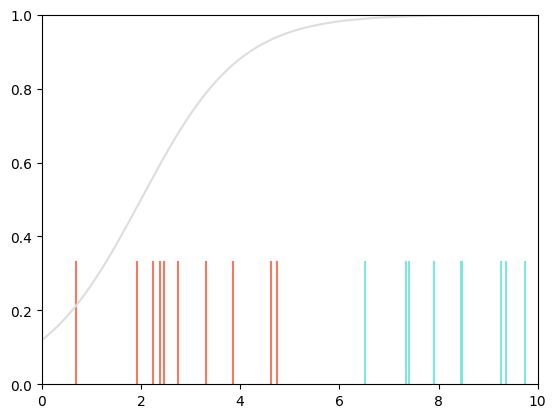

In [44]:
"""
Module 1.5: Main Code to Initialize Data, Generator, and Discriminator
- This code initializes the real data, generator parameters, synthesizes data, and initializes discriminator parameters.
"""

# Get data batch
x_real = get_real_data_batch(10)

# Initialize generator and synthesize a batch of examples
theta = 3.0
np.random.seed(1)
z = np.random.normal(size=(1,10))
x_syn = generator(z, theta)

# Initialize discriminator model
phi0 = -2
phi1 = 1

draw_data_model(x_real, x_syn, phi0, phi1)

In [45]:
"""Module 2.1: Loss Functions for Generator and Discriminator"""

# Discriminator loss
def compute_discriminator_loss(x_real, x_syn, phi0, phi1):

  # TODO -- compute the loss for the discriminator
  # Run the real data and the synthetic data through the discriminator
  y_real = discriminator(x_real, phi0, phi1)
  y_syn = discriminator(x_syn, phi0, phi1)

  # Then use the standard binary cross entropy loss with the y=1 for the real samples
  loss_real = -np.log(y_real)
  loss_syn = -np.log(1-y_syn)
  loss = np.sum(loss_real) + np.sum(loss_syn)

  return loss

In [46]:
# 1. Define Sample Data (x_real and x_syn)
batch_size = 10
x_real = np.random.rand(batch_size) * 5
x_syn = np.random.rand(batch_size) * 5

# 2. Initialize phi0 and phi1 with numerical values (e.g., floats or NumPy scalars)
phi0 = 1.0
phi1 = -0.5

# Test the loss
loss = compute_discriminator_loss(x_real, x_syn, phi0, phi1)
print("True Loss = 13.814757170851447, Your loss=", loss )

True Loss = 13.814757170851447, Your loss= 15.384860774910768


In [47]:
# Assuming compute_discriminator_loss is available from the previous steps

# Gradient of loss (cheating, using finite differences)
def compute_discriminator_gradient(x_real, x_syn, phi0, phi1):
    delta = 0.0001

    # 1. Compute the discriminator loss for initial phi0 and phi1 (loss1)
    loss1 = compute_discriminator_loss(x_real, x_syn, phi0, phi1)

    # 2. Update phi0 by delta and find the new loss (loss2)
    loss2 = compute_discriminator_loss(x_real, x_syn, phi0 + delta, phi1)

    # 3. Update phi1 by delta and find the new loss (loss3)
    loss3 = compute_discriminator_loss(x_real, x_syn, phi0, phi1 + delta)

    # 4. Find dl_dphi0 by taking the difference of loss2 and loss1 divided by delta
    dl_dphi0 = (loss2 - loss1) / delta

    # 5. Find dl_dphi1 by taking the difference of loss3 and loss1 divided by delta
    dl_dphi1 = (loss3 - loss1) / delta

    return dl_dphi0, dl_dphi1

# This routine performs gradient descent with the discriminator
def update_discriminator(x_real, x_syn, n_iter, phi0, phi1):

    # Define learning rate
    alpha = 0.01

    # Get derivatives
    print("Initial discriminator loss = ", compute_discriminator_loss(x_real, x_syn, phi0, phi1))

    for iter in range(n_iter):
        # Get gradient
        dl_dphi0, dl_dphi1 = compute_discriminator_gradient(x_real, x_syn, phi0, phi1)

        # TODO: Update phi0 and phi1 using the gradients and learning rate
        phi0 = phi0 - alpha * dl_dphi0
        phi1 = phi1 - alpha * dl_dphi1

    print("Final Discriminator Loss= ", compute_discriminator_loss(x_real, x_syn, phi0, phi1))

    return phi0, phi1

Initial parameters (phi0,phi1) 1.0 -0.5
Initial discriminator loss =  15.384860774910768
Final Discriminator Loss=  13.899797625429262
Final parameters (phi0,phi1) 0.30937350349005044 -0.09908549768794472


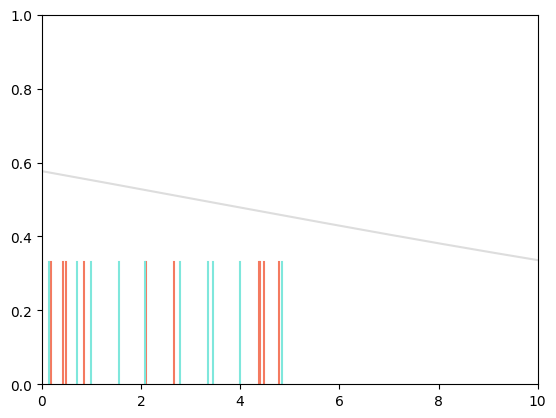

In [48]:
# Let's update the discriminator (sigmoid curve)
n_iter = 100
print("Initial parameters (phi0,phi1)", phi0, phi1)
phi0, phi1 = update_discriminator(x_real, x_syn, n_iter, phi0, phi1)
print("Final parameters (phi0,phi1)", phi0, phi1)
draw_data_model(x_real, x_syn, phi0, phi1)

In [54]:
"""Module 2.3: Generator Loss Function
- This module contains the loss function for the generator.
"""

def compute_generator_loss(z, theta, phi0, phi1):
  # TODO -- Run the generator on the latent variables z with the parameters theta
  # to generate new data x_syn
  x_syn = generator(z, theta)
  # Then run the discriminator on the new data to get the probability of being real
  y_syn = discriminator(x_syn, phi0, phi1)
  # The loss is the total negative log probability of being synthesized (i.e. of not being real)
  loss_syn = -np.sum(np.log(1-y_syn))
  loss = loss_syn

  return loss

In [55]:
# Test generator loss to check you have it correct
loss = compute_generator_loss(z, theta, -2, 1)
print("True Loss = 13.78437035945412, Your loss=", loss )

True Loss = 13.78437035945412, Your loss= 12.465935608048017


In [56]:
"""
Module 2.4: Generator Update Function
- This module contains functions to compute the gradient of the generator loss and update the generator parameters.
"""

def compute_generator_gradient(z, theta, phi0, phi1):
  delta = 0.0001

  # TODO: Compute the generator loss for initial theta value
  loss1 = compute_generator_loss(z, theta, phi0, phi1)

  # TODO: Update theta by delta and find the new loss
  loss2 = compute_generator_loss(z, theta + delta, phi0, phi1)
  # Find dl_dtheta by taking the difference of loss2 and loss1 divided by delta
  dl_dtheta = (loss2 - loss1) / delta

  return dl_dtheta

def update_generator(z, theta, n_iter, phi0, phi1):
    # Define learning rate
    alpha = 0.02

    # Get derivatives
    print("Initial generator loss = ", compute_generator_loss(z, theta, phi0, phi1))
    for iter in range(n_iter):
      # Get gradient
      dl_dtheta = compute_generator_gradient(z, theta, phi0, phi1)

      # TODO: Update theta using the gradient and learning rate
      # Take a gradient step (uphill, since we are trying to make synthesized data less well classified by discriminator)
      theta = theta + alpha * dl_dtheta

    print("Final generator loss = ", compute_generator_loss(z, theta, phi0, phi1))
    return theta


Theta before 3.0
Initial generator loss =  12.465935608048017
Final generator loss =  24.92173615890802
Theta after 4.560912518824509


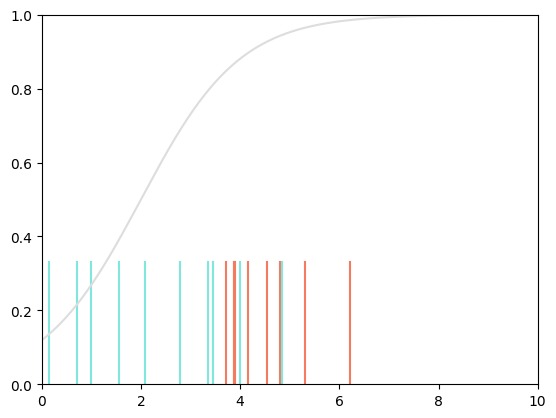

In [57]:
n_iter = 10
theta = 3.0
print("Theta before", theta)
# This line is correct, assuming update_generator returns the new theta
theta = update_generator(z, theta, n_iter, phi0, phi1)
print("Theta after", theta)

x_syn = generator(z,theta)
draw_data_model(x_real, x_syn, phi0, phi1)

Final parameters (phi0,phi1) -2 1


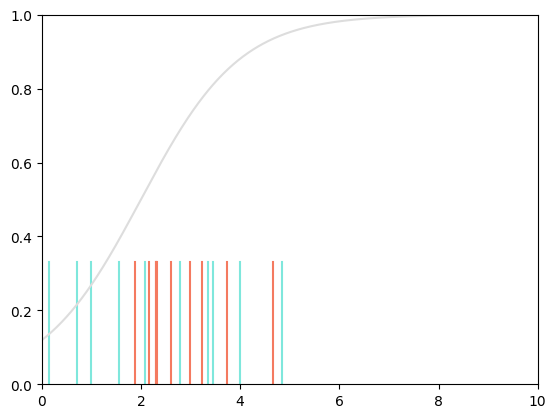

Updating discriminator
Initial discriminator loss =  19.911502847834345
Final Discriminator Loss=  13.577656315713988


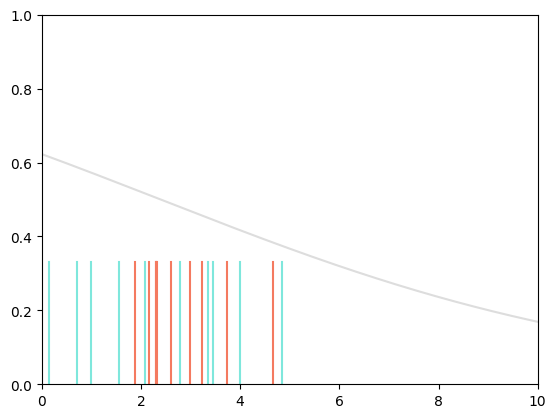

Updating generator
Initial generator loss =  6.530163665021164
Final generator loss =  6.57035726580148


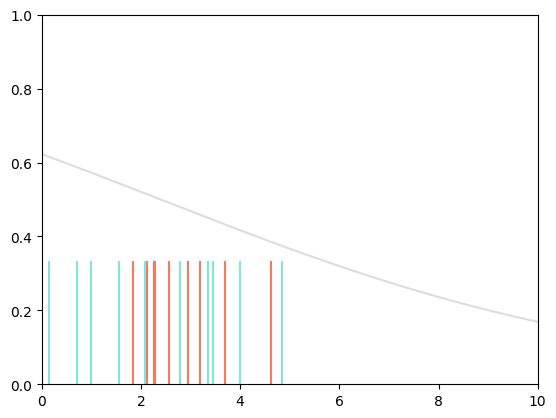

Updating discriminator
Initial discriminator loss =  13.617849916494304
Final Discriminator Loss=  13.599231250088973


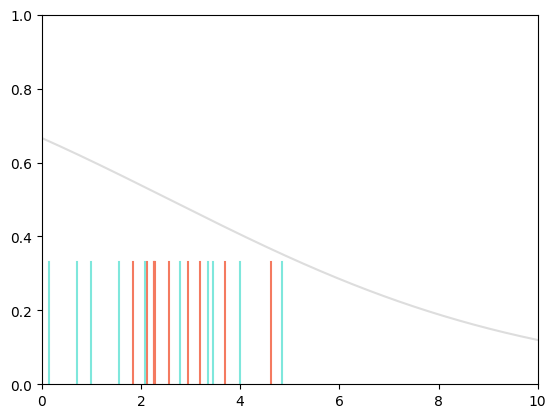

Updating generator
Initial generator loss =  6.71741599017181
Final generator loss =  6.7860577057278375


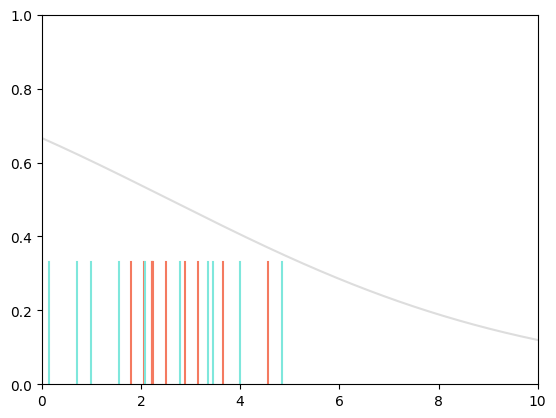

Updating discriminator
Initial discriminator loss =  13.667872965645
Final Discriminator Loss=  13.664785406189935


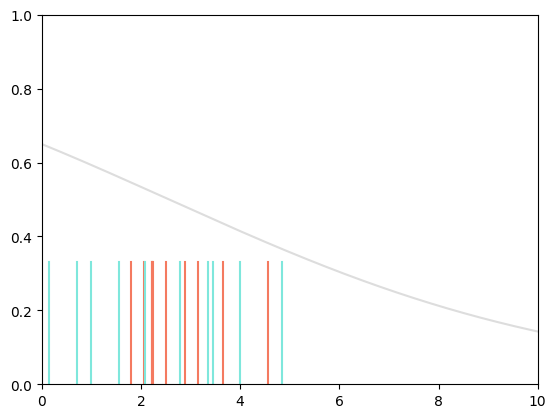

Updating generator
Initial generator loss =  6.784770456159906
Final generator loss =  6.84097075306446


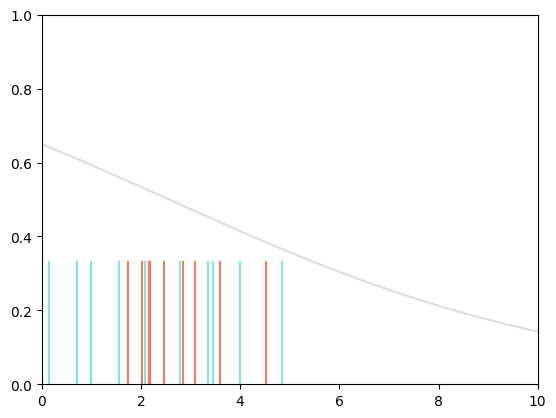

Updating discriminator
Initial discriminator loss =  13.720985703094488
Final Discriminator Loss=  13.716396955693089


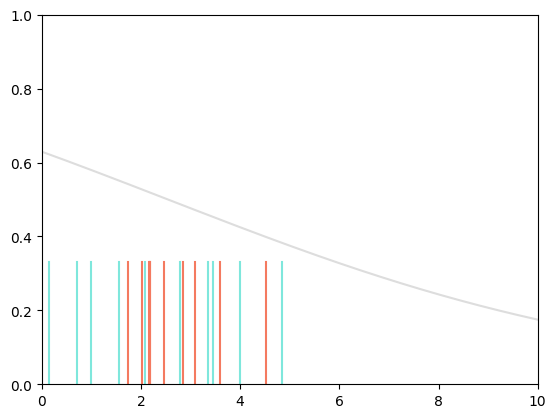

Updating generator
Initial generator loss =  6.825097098155855
Final generator loss =  6.867324610638838


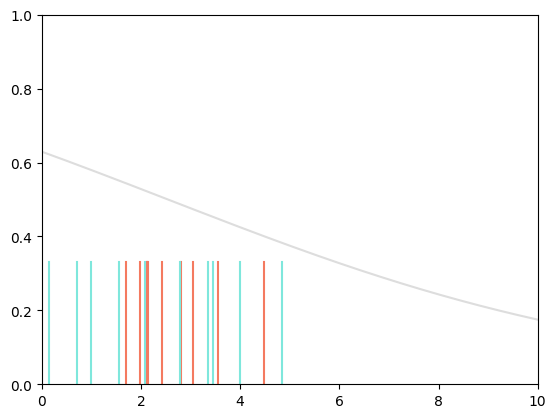

Updating discriminator
Initial discriminator loss =  13.758624468176073
Final Discriminator Loss=  13.754971067112198


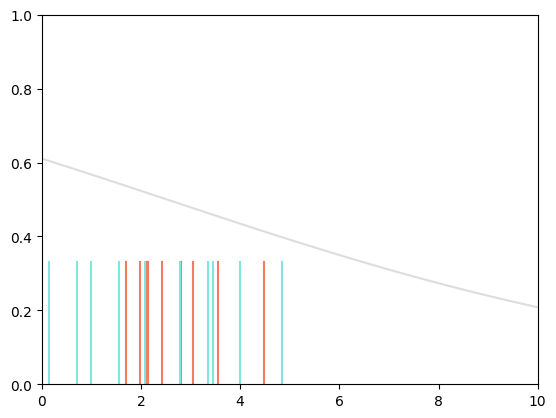

Updating generator
Initial generator loss =  6.85378211212664
Final generator loss =  6.885062035637072


In [60]:
"""
Module 3: Full GAN Loop
- This code runs the full GAN loop, alternating between updating the discriminator and the generator.
"""

# Initialize the parameters
theta = 3
phi0 = -2
phi1 = 1

# Number of iterations for updating generator and discriminator
n_iter_discrim = 300
n_iter_gen = 2

print("Final parameters (phi0,phi1)", phi0, phi1)
for c_gan_iter in range(5):

  # Run generator to product synthesized data
  x_syn = generator(z, theta)
  draw_data_model(x_real, x_syn, phi0, phi1)

  # Update the discriminator
  print("Updating discriminator")
  phi0, phi1 = update_discriminator(x_real, x_syn, n_iter_discrim, phi0, phi1)
  draw_data_model(x_real, x_syn, phi0, phi1)

  # Update the generator
  print("Updating generator")
  theta = update_generator(z, theta, n_iter_gen, phi0, phi1)
